In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from scipy.stats import linregress
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
import statsmodels.api as sm
from xgboost import XGBRegressor
from statsmodels.tsa.arima.model import ARIMA
df=pd.read_excel('/content/final dataset.xlsx')
df.head()

,Day Index,Year,Month,Day,Quantity,Clicks,Impressions,modified_Quantity,log_Quantity,log_Clicks,log_Impressions
0,2021-12-01,2021-12,December,Wednesday,14,445,620,14.00,2.708050,6.100319,6.431331
1,2021-12-02,2021-12,December,Thursday,10,433,890,10.00,2.397895,6.073045,6.792344
2,2021-12-03,2021-12,December,Friday,13,424,851,13.00,2.639057,6.052089,6.747587
3,2021-12-04,2021-12,December,Saturday,22,427,881,22.00,3.135494,6.059123,6.782192
4,2021-12-05,2021-12,December,Sunday,33,451,678,30.67,3.455370,6.113682,6.520621


In [ ]:
df.tail()

,Day Index,Year,Month,Day,Quantity,Clicks,Impressions,modified_Quantity,log_Quantity,log_Clicks,log_Impressions
207,2022-06-26,2022-06,June,Sunday,13,114,1218,13.0,2.639057,4.744932,7.105786
208,2022-06-27,2022-06,June,Monday,16,106,1311,16.0,2.833213,4.672829,7.179308
209,2022-06-28,2022-06,June,Tuesday,13,109,885,13.0,2.639057,4.700480,6.786717
210,2022-06-29,2022-06,June,Wednesday,16,60,1000,16.0,2.833213,4.110874,6.908755
211,2022-06-30,2022-06,June,Thursday,8,65,875,8.0,2.197225,4.189655,6.775366


In [ ]:
df.shape

(212, 11)

In [ ]:
df.columns

Index(['Year', 'Month', 'Day', 'Quantity', 'Clicks', 'Impressions',
       'modified_Quantity', 'log_Quantity', 'log_Clicks', 'log_Impressions',
       'Day of Week'],
      dtype='object')

In [ ]:
df.describe()

,Day Index,Quantity,Clicks,Impressions,modified_Quantity,log_Quantity,log_Clicks,log_Impressions
count,212,212.000000,212.00000,212.000000,212.000000,212.000000,212.000000,212.000000
mean,2022-03-16 12:00:00,17.542453,358.20283,1531.702830,17.430896,2.868143,5.729375,7.292140
min,2021-12-01 00:00:00,5.000000,60.00000,620.000000,5.000000,1.791759,4.110874,6.431331
25%,2022-01-22 18:00:00,13.750000,154.00000,1209.750000,13.750000,2.690802,5.043425,7.098977
50%,2022-03-16 12:00:00,17.000000,402.50000,1460.000000,17.000000,2.890372,6.000170,7.286876
75%,2022-05-08 06:00:00,21.000000,492.75000,1862.000000,21.000000,3.091042,6.202026,7.529939
max,2022-06-30 00:00:00,38.000000,726.00000,2707.000000,31.000000,3.465736,6.588926,7.903966
std,NaN,5.790423,164.52160,440.660783,5.467691,0.310678,0.616333,0.297393


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Day Index          212 non-null    datetime64[ns]
 1   Year               212 non-null    object        
 2   Month              212 non-null    object        
 3   Day                212 non-null    object        
 4   Quantity           212 non-null    int64         
 5   Clicks             212 non-null    int64         
 6   Impressions        212 non-null    int64         
 7   modified_Quantity  212 non-null    float64       
 8   log_Quantity       212 non-null    float64       
 9   log_Clicks         212 non-null    float64       
 10  log_Impressions    212 non-null    float64       
dtypes: datetime64[ns](1), float64(4), int64(3), object(3)
memory usage: 18.3+ KB


In [ ]:
df.isnull().sum()

,0
Day Index,0
Year,0
Month,0
Day,0
Quantity,0
Clicks,0
Impressions,0
modified_Quantity,0
log_Quantity,0
log_Clicks,0


In [ ]:
df.drop_duplicates()

,Day Index,Year,Month,Day,Quantity,Clicks,Impressions,modified_Quantity,log_Quantity,log_Clicks,log_Impressions
0,2021-12-01,2021-12,December,Wednesday,14,445,620,14.00,2.708050,6.100319,6.431331
1,2021-12-02,2021-12,December,Thursday,10,433,890,10.00,2.397895,6.073045,6.792344
2,2021-12-03,2021-12,December,Friday,13,424,851,13.00,2.639057,6.052089,6.747587
3,2021-12-04,2021-12,December,Saturday,22,427,881,22.00,3.135494,6.059123,6.782192
4,2021-12-05,2021-12,December,Sunday,33,451,678,30.67,3.455370,6.113682,6.520621
...,...,...,...,...,...,...,...,...,...,...,...
207,2022-06-26,2022-06,June,Sunday,13,114,1218,13.00,2.639057,4.744932,7.105786
208,2022-06-27,2022-06,June,Monday,16,106,1311,16.00,2.833213,4.672829,7.179308
209,2022-06-28,2022-06,June,Tuesday,13,109,885,13.00,2.639057,4.700480,6.786717
210,2022-06-29,2022-06,June,Wednesday,16,60,1000,16.00,2.833213,4.110874,6.908755


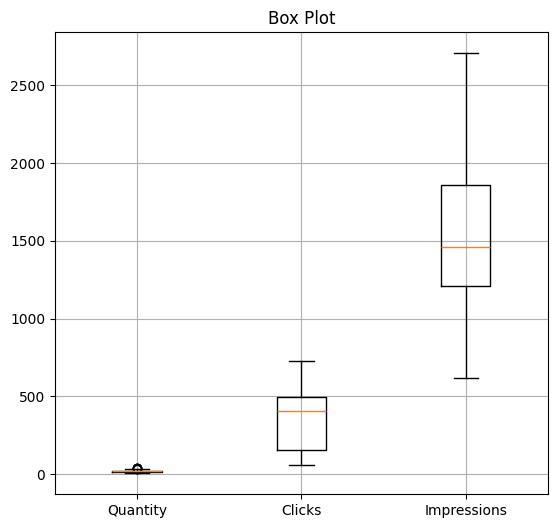

In [ ]:
plt.figure(figsize=(14, 6))
plt.subplot(121)
plt.boxplot([df[col] for col in ['Quantity', 'Clicks', 'Impressions']], labels=['Quantity', 'Clicks', 'Impressions'])
plt.title('Box Plot')
plt.grid(True)
plt.show()

In [ ]:
def find_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data < lower_bound) | (data > upper_bound)]
quantity_outliers = find_outliers_iqr(df['Quantity'])
clicks_outliers = find_outliers_iqr(df['Clicks'])
impressions_outliers = find_outliers_iqr(df['Impressions'])
print("Quantity Outliers:\n", quantity_outliers)
print("\nClicks Outliers:\n", clicks_outliers)
print("\nImpressions Outliers:\n", impressions_outliers)

Quantity Outliers:
 4      33
9      38
78     38
113    32
142    36
Name: Quantity, dtype: int64

Clicks Outliers:
 Series([], Name: Clicks, dtype: int64)

Impressions Outliers:
 Series([], Name: Impressions, dtype: int64)


In [ ]:
quantity_diff = df[df['Quantity'] != df['modified_Quantity']]
quantity_diff

,Day Index,Year,Month,Day,Quantity,Clicks,Impressions,modified_Quantity,log_Quantity,log_Clicks,log_Impressions
4,2021-12-05,2021-12,December,Sunday,33,451,678,30.67,3.45537,6.113682,6.520621
9,2021-12-10,2021-12,December,Friday,38,391,1129,30.67,3.45537,5.971262,7.029973
78,2022-02-17,2022-02,February,Thursday,38,505,2351,30.67,3.45537,6.226537,7.763021
113,2022-03-24,2022-03,March,Thursday,32,547,1321,30.67,3.45537,6.306275,7.186901
142,2022-04-22,2022-04,April,Friday,36,470,1163,30.67,3.45537,6.154858,7.059618


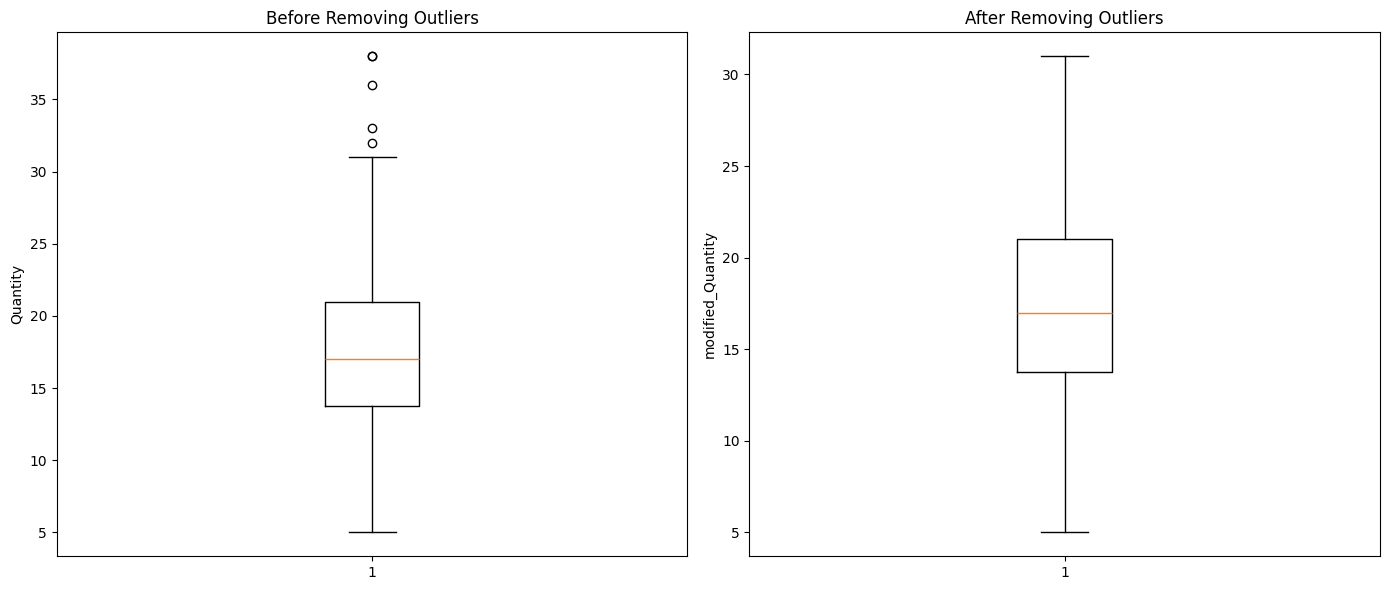

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
axes[0].boxplot(df['Quantity'])
axes[0].set_title('Before Removing Outliers')
axes[0].set_ylabel('Quantity')
axes[1].boxplot(df['modified_Quantity'])
axes[1].set_title('After Removing Outliers')
axes[1].set_ylabel('modified_Quantity')
plt.tight_layout()
plt.show()

In [ ]:
df['Day Index'] = pd.to_datetime(df['Day Index'],format='%d-%m-%Y %H:%M', errors='coerce')
df['Year'] = df['Day Index'].dt.to_period('M')
df['Month'] = df['Day Index'].dt.strftime('%B')
df['Day'] = df['Day Index'].dt.day_name()
df['modified_Quantity'] = df['modified_Quantity'].fillna(df['modified_Quantity'].median())

In [ ]:
df['log_Quantity'] = np.log(df['modified_Quantity'] + 1)
df['log_Clicks'] = np.log(df['Clicks'] + 1)
df['log_Impressions'] = np.log(df['Impressions'] + 1)

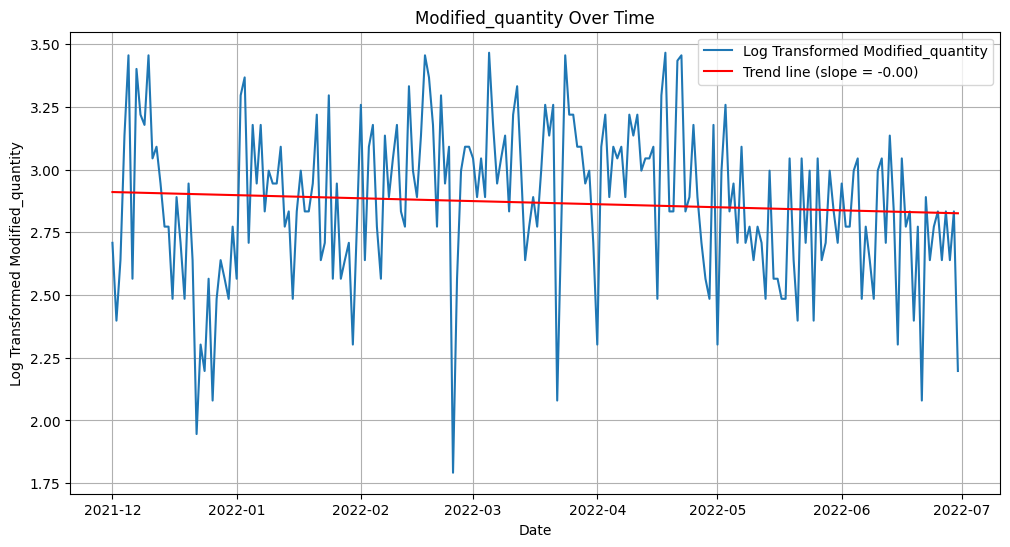

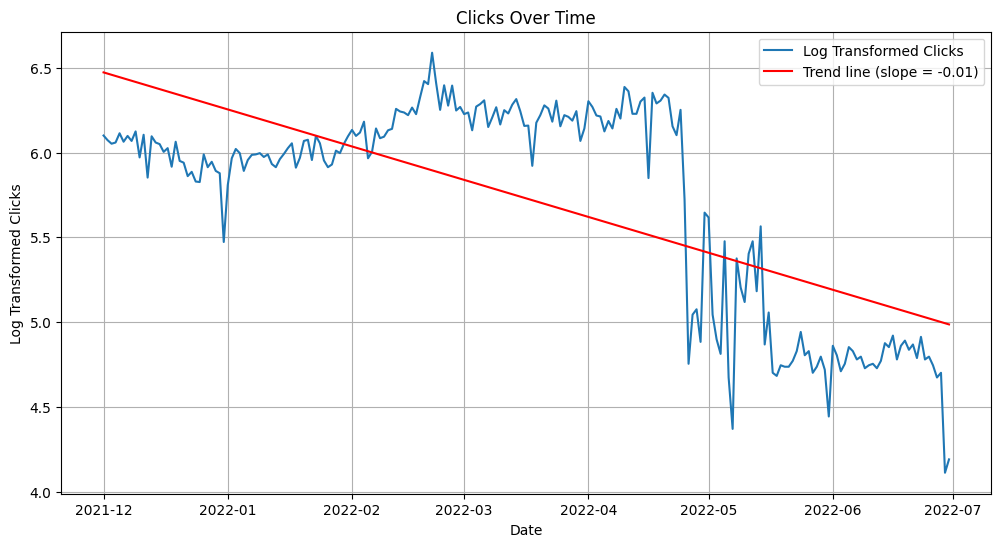

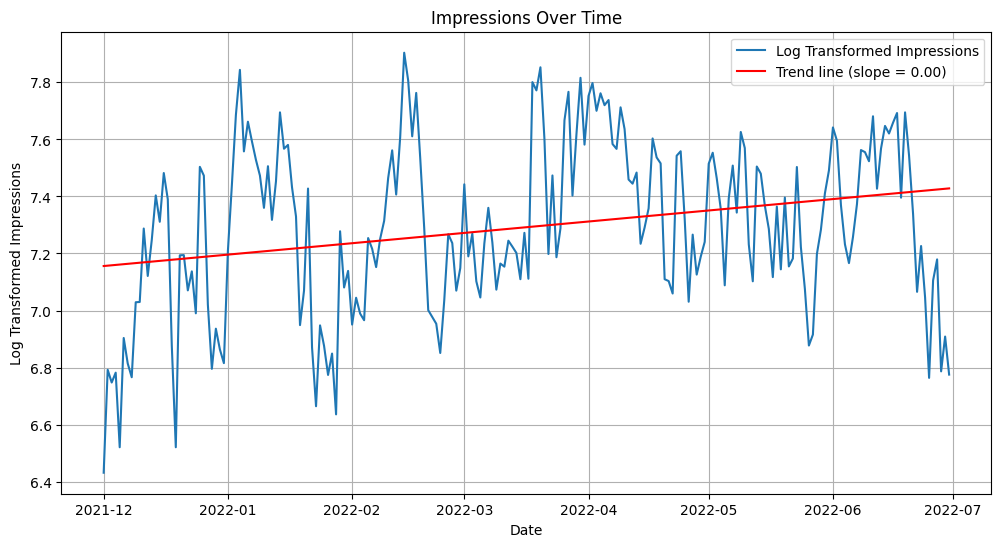

In [ ]:
modified_data_ = df.copy()
def plot(data, column, title, ylabel):
    data[f'log_{column}'] = np.log1p(data[column])
    transformed_column = f'log_{column}'
    x = np.arange(len(data))
    y = data[transformed_column].values
    slope, intercept, *_ = linregress(x, y)
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=data, x=data.index, y=transformed_column, label=f'Log Transformed {column.capitalize()}')
    plt.plot(data.index, intercept + slope * x, 'r', label=f'Trend line (slope = {slope:.2f})')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel(ylabel)
    plt.legend()
    plt.grid(True)
    plt.show()
modified_data_['Day Index'] = pd.to_datetime(modified_data_['Day Index'],format='%d-%m-%Y %H:%M', errors='coerce')
modified_data_.set_index('Day Index', inplace=True)
numerical_columns = ['modified_Quantity', 'Clicks', 'Impressions']
for column in numerical_columns:
    plot(modified_data_, column, f'{column.capitalize()} Over Time', f'Log Transformed {column.capitalize()}')

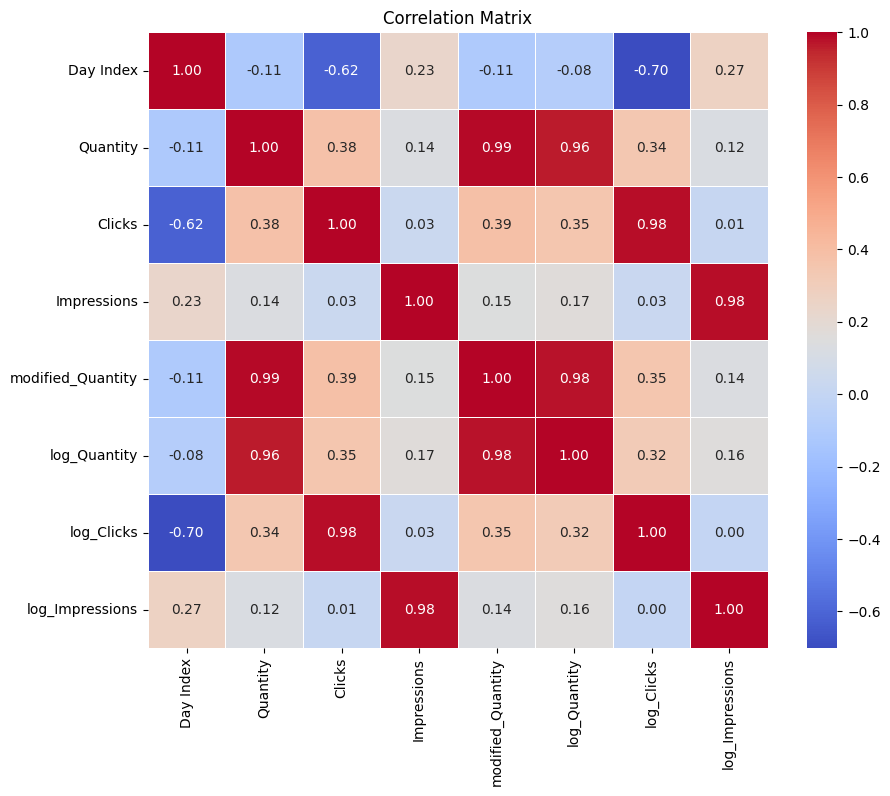

In [ ]:
def calculate_and_plot_correlation_matrix(file_path):
    df['Day Index'] = pd.to_numeric(df['Day Index'], errors='coerce')
    numeric_data = df.select_dtypes(include=[float, int])
    correlation_matrix = numeric_data.corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
    plt.title('Correlation Matrix')
    plt.show()
file_path='/content/final dataset.xlsx'
calculate_and_plot_correlation_matrix(df)

In [ ]:
#target_variable = 'Quantity'
#predictors = ['Impressions','Clicks']

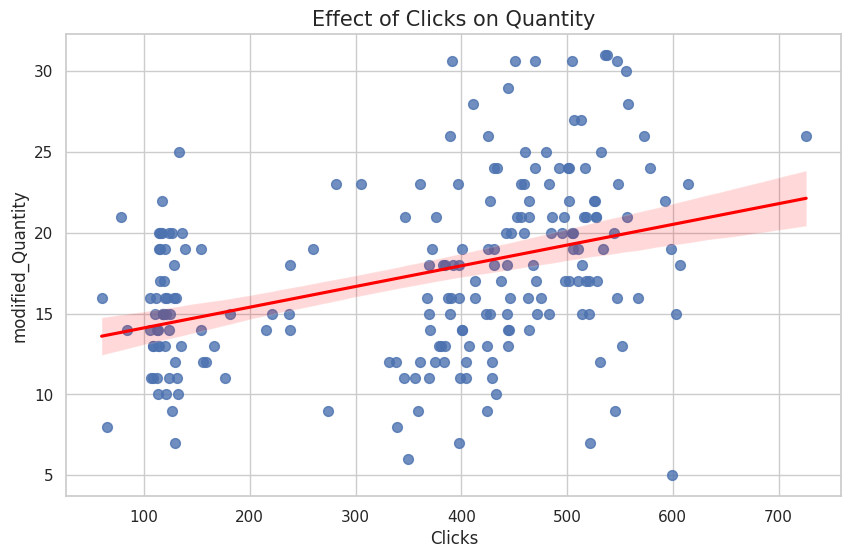

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.regplot(x='Clicks', y='modified_Quantity', data=df, scatter_kws={'s':50}, line_kws={'color':'red'})
plt.title('Effect of Clicks on Quantity', fontsize=15)
plt.xlabel('Clicks', fontsize=12)
plt.ylabel('modified_Quantity', fontsize=12)
plt.show()

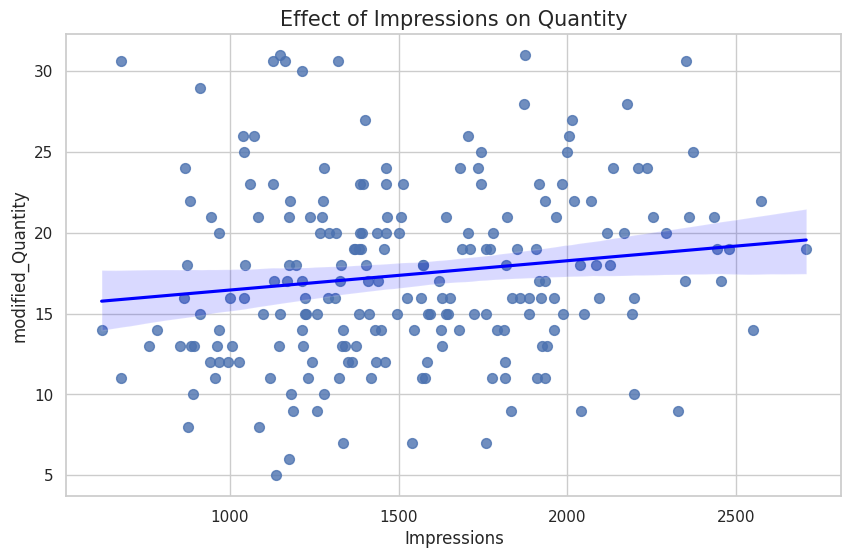

In [ ]:
plt.figure(figsize=(10, 6))
sns.regplot(x='Impressions', y='modified_Quantity', data=df, scatter_kws={'s':50}, line_kws={'color':'blue'})
plt.title('Effect of Impressions on Quantity', fontsize=15)
plt.xlabel('Impressions', fontsize=12)
plt.ylabel('modified_Quantity', fontsize=12)
plt.show()

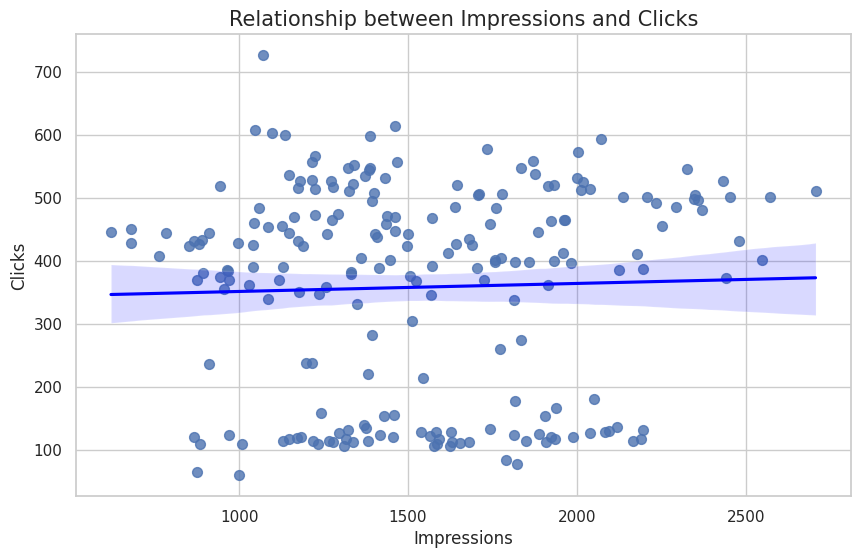

In [ ]:
plt.figure(figsize=(10, 6))
sns.regplot(x='Impressions', y='Clicks', data=df, scatter_kws={'s':50}, line_kws={'color':'blue'})
plt.title('Relationship between Impressions and Clicks', fontsize=15)
plt.xlabel('Impressions', fontsize=12)
plt.ylabel('Clicks', fontsize=12)
plt.show()

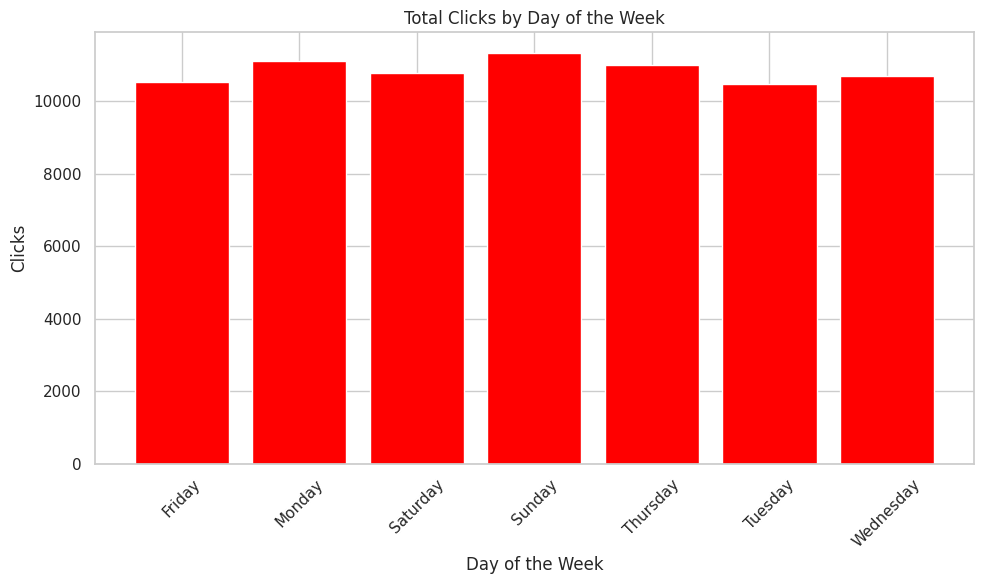

In [ ]:
def plot_Clicks_by_day(merged_df):
    merged_df['Day of Week'] = pd.to_datetime(merged_df['Day Index']).dt.day_name()
    Clicks_by_day = merged_df.groupby('Day of Week')['Clicks'].sum()
    plt.figure(figsize=(10, 6))
    plt.bar(Clicks_by_day.index, Clicks_by_day.values, color='red')
    plt.xlabel('Day of the Week')
    plt.ylabel('Clicks')
    plt.title('Total Clicks by Day of the Week')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
plot_Clicks_by_day(df)

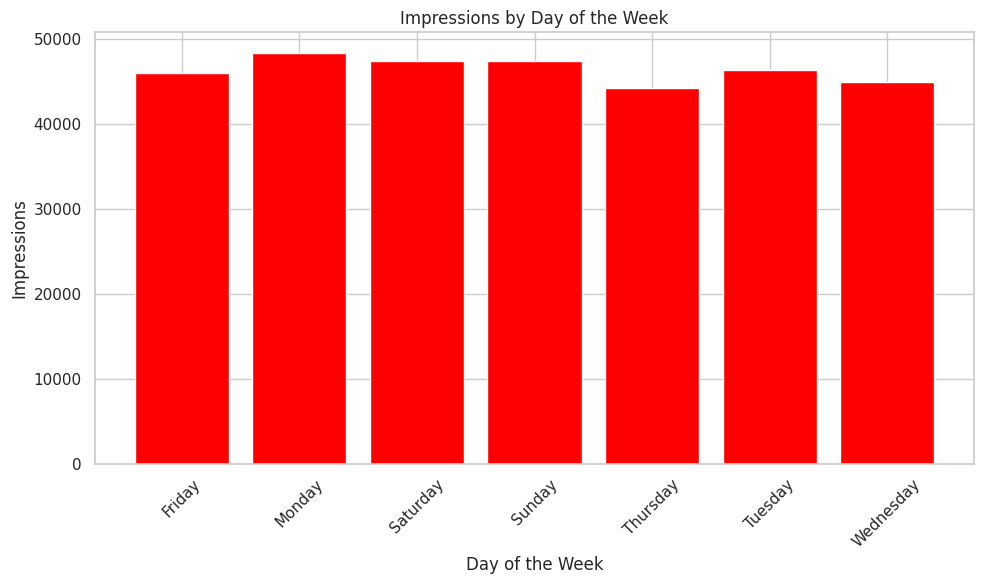

In [ ]:
def plot_Impressions_by_day(merged_df):
    merged_df['Day of Week'] = pd.to_datetime(merged_df['Day Index']).dt.day_name()
    Impressions_by_day = merged_df.groupby('Day of Week')['Impressions'].sum()
    plt.figure(figsize=(10, 6))
    plt.bar(Impressions_by_day.index, Impressions_by_day.values, color='red')
    plt.xlabel('Day of the Week')
    plt.ylabel('Impressions')
    plt.title('Impressions by Day of the Week')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
plot_Impressions_by_day(df)

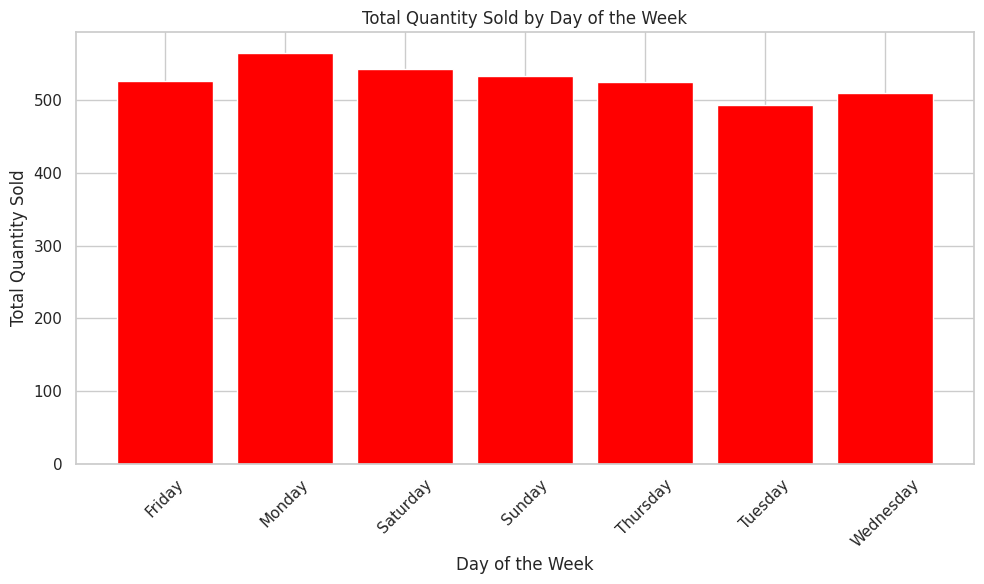

In [ ]:
def plot_quantity_by_day(merged_df):
    merged_df['Day of Week'] = pd.to_datetime(merged_df['Day Index']).dt.day_name()
    quantity_by_day = merged_df.groupby('Day of Week')['modified_Quantity'].sum()
    plt.figure(figsize=(10, 6))
    plt.bar(quantity_by_day.index, quantity_by_day.values, color='red')
    plt.xlabel('Day of the Week')
    plt.ylabel('Total Quantity Sold')
    plt.title('Total Quantity Sold by Day of the Week')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
plot_quantity_by_day(df)

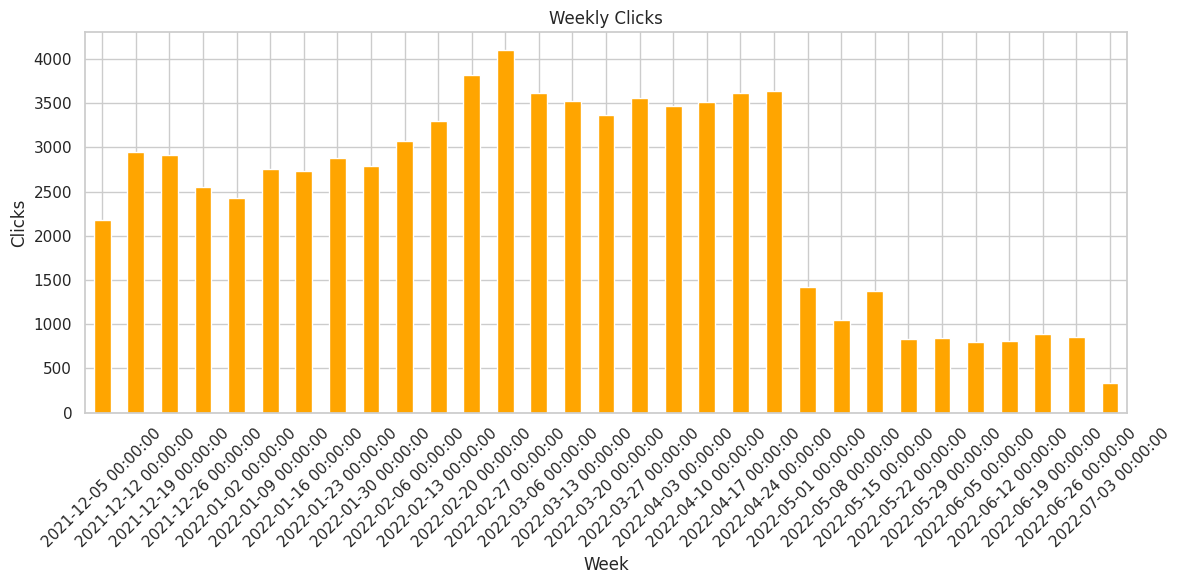

Week starting on 2022-02-27 had the highest clicks with 4095 clicks.


In [ ]:
df['Day Index'] = pd.to_datetime(df['Day Index'])
df.set_index('Day Index', inplace=True)
weekly_clicks = df['Clicks'].resample('W').sum()
plt.figure(figsize=(12, 6))
weekly_clicks.plot(kind='bar',color='orange')
plt.title('Weekly Clicks')
plt.xlabel('Week')
plt.ylabel('Clicks')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
highest_week = weekly_clicks.idxmax(), weekly_clicks.max()
print(f"Week starting on {highest_week[0].strftime('%Y-%m-%d')} had the highest clicks with {highest_week[1]} clicks.")


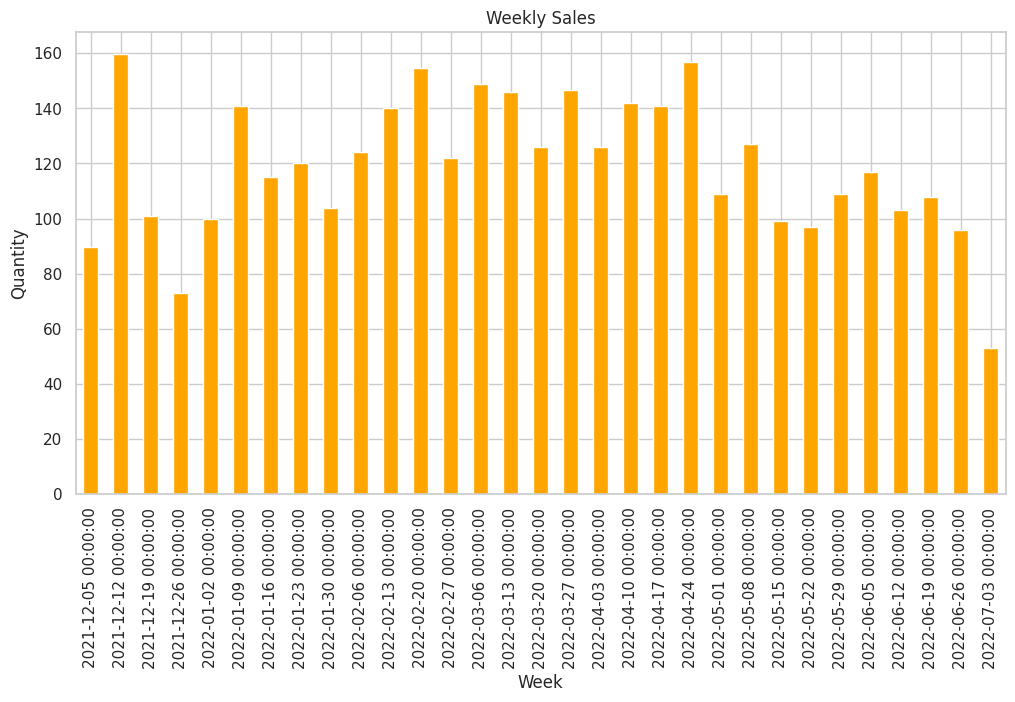

Weekly Sales: 2021-12-12 with 159.67000000000002 Quantity sold have the highest sales.


In [ ]:
df['Day Index'] = pd.to_datetime(df['Day Index'],format='%d-%m-%Y %H:%M')
df.set_index('Day Index', inplace=True)
plt.figure(figsize=(12, 6))
weekly_sales = df['modified_Quantity'].resample('W').sum()
weekly_sales.plot(kind='bar',color='orange')
plt.title('Weekly Sales')
plt.xlabel('Week')
plt.ylabel('Quantity')
plt.show()
highest_week = weekly_sales.idxmax(), weekly_sales.max()
print(f"Weekly Sales: {highest_week[0].strftime('%Y-%m-%d')} with {highest_week[1]} Quantity sold have the highest sales.")

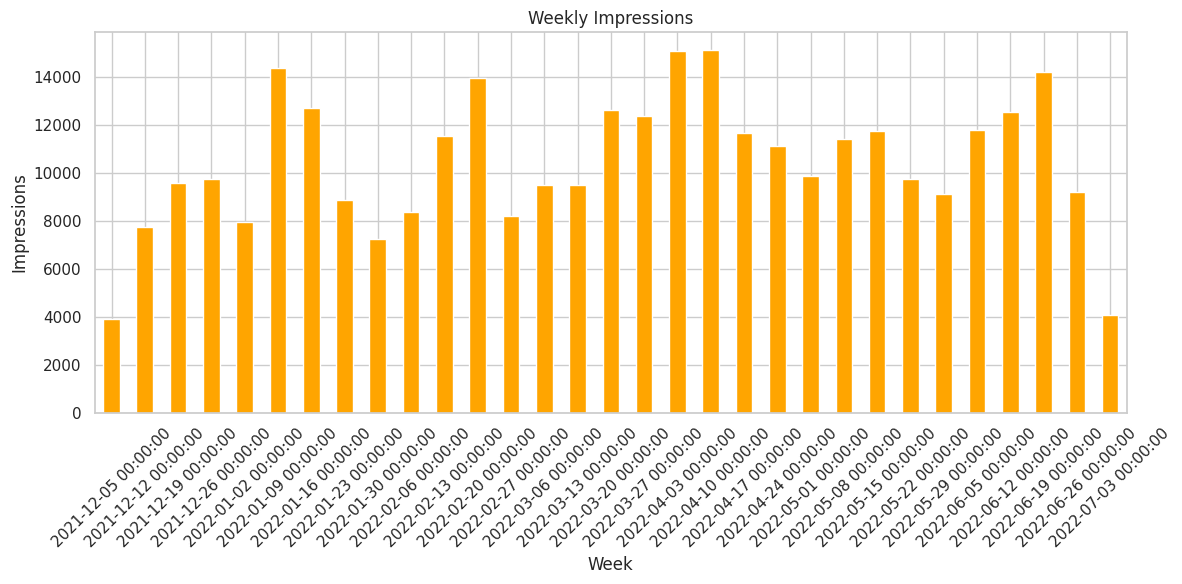

Week starting on 2022-04-10 had the highest Impressions with 15096 Impressions.


In [ ]:
df['Day Index'] = pd.to_datetime(df['Day Index'],format='%d-%m-%Y %H:%M')
df.set_index('Day Index', inplace=True)
weekly_Impressions = df['Impressions'].resample('W').sum()
plt.figure(figsize=(12, 6))
weekly_Impressions.plot(kind='bar',color='orange')
plt.title('Weekly Impressions')
plt.xlabel('Week')
plt.ylabel('Impressions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
highest_week = weekly_Impressions.idxmax(), weekly_Impressions.max()
print(f"Week starting on {highest_week[0].strftime('%Y-%m-%d')} had the highest Impressions with {highest_week[1]} Impressions.")

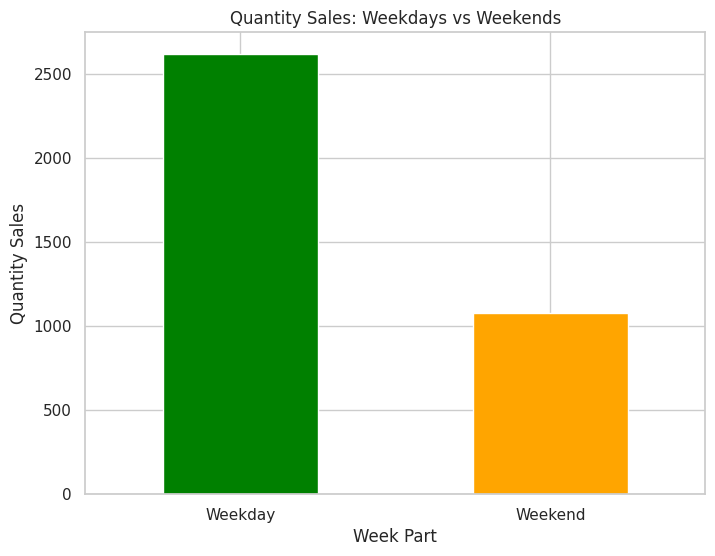

In [ ]:
df['Day Index'] = pd.to_datetime(df['Day Index'], format="%d-%m-%Y %H:%M", errors='coerce')
df['Day of Week'] = df['Day Index'].dt.dayofweek
df['Week Part'] = df['Day of Week'].apply(lambda x: 'Weekday' if x < 5 else 'Weekend')
week_part_sales = df.groupby('Week Part')['modified_Quantity'].sum().reindex(['Weekday', 'Weekend'])
plt.figure(figsize=(8, 6))
week_part_sales.plot(kind='bar', color=['green', 'orange'])
plt.title('Quantity Sales: Weekdays vs Weekends')
plt.xlabel('Week Part')
plt.ylabel('Quantity Sales')
plt.xticks(rotation=0)
plt.show()


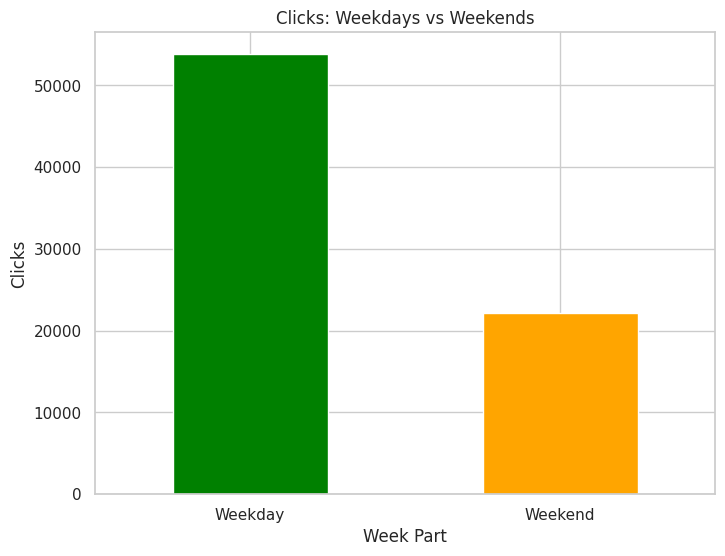

In [ ]:
df['Day Index'] = pd.to_datetime(df['Day Index'])
df['Day of Week'] = df['Day Index'].dt.dayofweek
df['Week Part'] = df['Day of Week'].apply(lambda x: 'Weekday' if x < 5 else 'Weekend')
week_part_Clicks = df.groupby('Week Part')['Clicks'].sum().reindex(['Weekday', 'Weekend'])
plt.figure(figsize=(8, 6))
week_part_Clicks.plot(kind='bar', color=['green', 'orange'])
plt.title('Clicks: Weekdays vs Weekends')
plt.xlabel('Week Part')
plt.ylabel('Clicks')
plt.xticks(rotation=0)
plt.show()

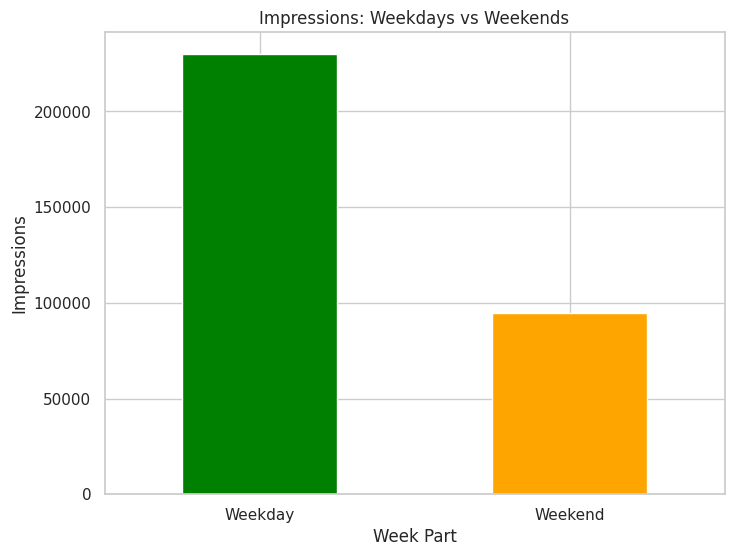

In [ ]:
df['Day Index'] = pd.to_datetime(df['Day Index'])
df['Day of Week'] = df['Day Index'].dt.dayofweek
df['Week Part'] = df['Day of Week'].apply(lambda x: 'Weekday' if x < 5 else 'Weekend')
week_part_Impressions = df.groupby('Week Part')['Impressions'].sum().reindex(['Weekday', 'Weekend'])
plt.figure(figsize=(8, 6))
week_part_Impressions.plot(kind='bar', color=['green', 'orange'])
plt.title('Impressions: Weekdays vs Weekends')
plt.xlabel('Week Part')
plt.ylabel('Impressions')
plt.xticks(rotation=0)
plt.show()

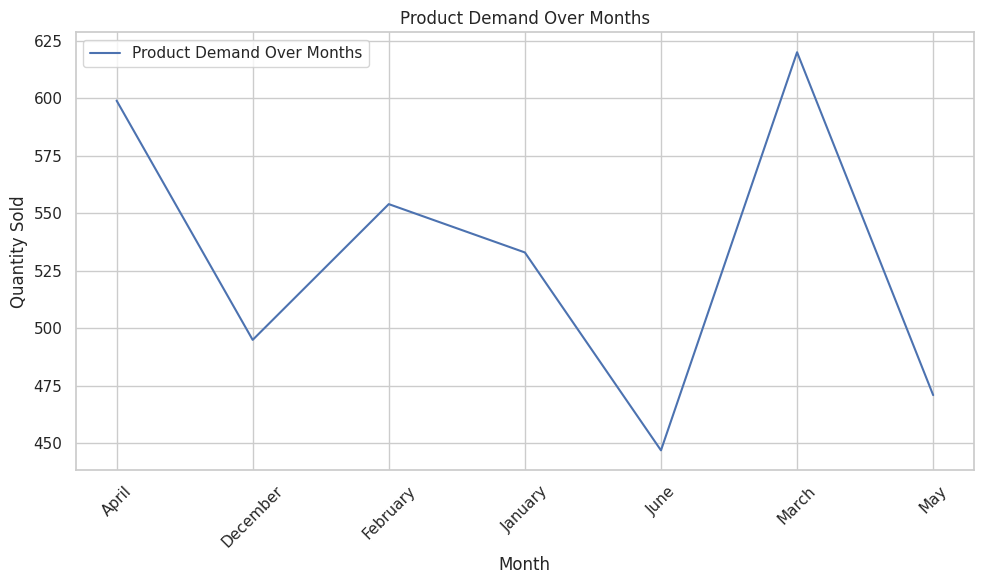

In [ ]:
plt.figure(figsize=(10, 6))
df_group_month = df.groupby('Month', as_index=False)['Quantity'].sum()
sns.lineplot(data=df_group_month, x='Month', y='Quantity', label='Product Demand Over Months')
plt.title('Product Demand Over Months')
plt.xlabel('Month')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


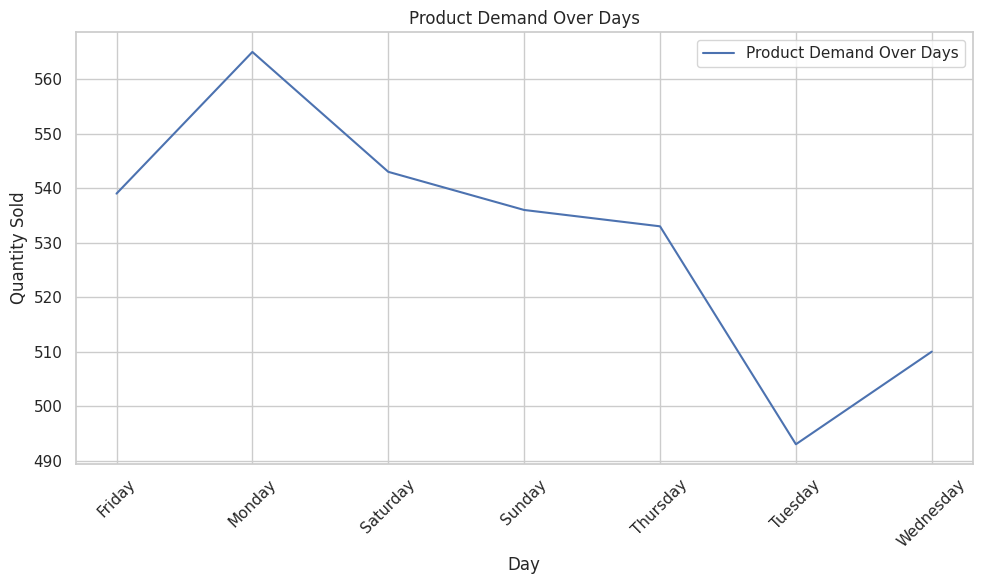

In [ ]:
plt.figure(figsize=(10, 6))
df_group_day = df.groupby('Day', as_index=False)['Quantity'].sum()
sns.lineplot(data=df_group_day, x='Day', y='Quantity', label='Product Demand Over Days')
plt.title('Product Demand Over Days')
plt.xlabel('Day')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


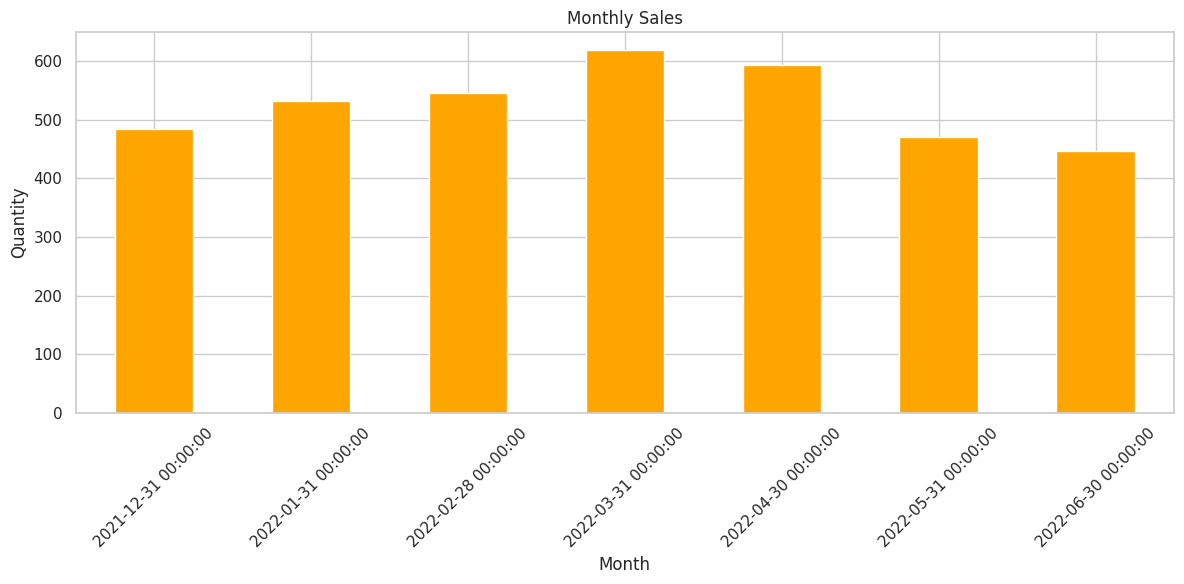

Month of March 2022 had the highest sales with 618.67 units sold.


In [ ]:
df.index = pd.to_datetime(df.index, format="%d-%m-%Y %H:%M", errors='coerce')
monthly_sales = df['modified_Quantity'].resample('ME').sum()
plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='bar',color='orange')
plt.title('Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Quantity')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
highest_month = monthly_sales.idxmax(), monthly_sales.max()
print(f"Month of {highest_month[0].strftime('%B %Y')} had the highest sales with {highest_month[1]} units sold.")


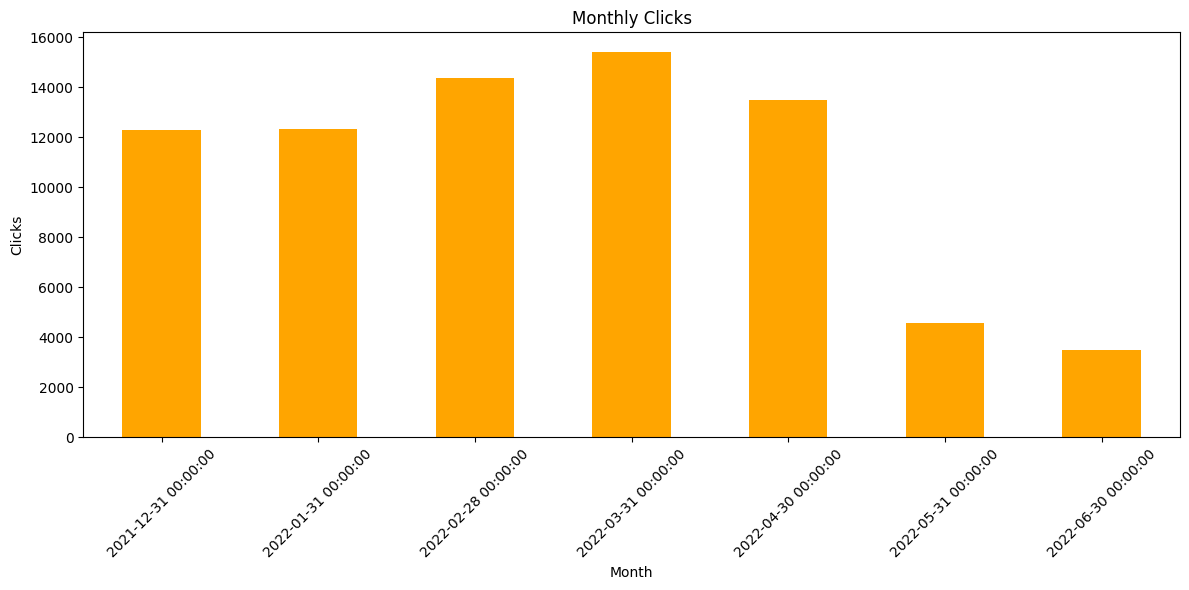

Month of March 2022 had the highest Clicks with 15419 Clicks.


In [ ]:
df.index = pd.to_datetime(df.index, format="%d-%m-%Y %H:%M", errors='coerce')
monthly_clicks = df['Clicks'].resample('ME').sum()
plt.figure(figsize=(12, 6))
monthly_clicks.plot(kind='bar',color='orange')
plt.title('Monthly Clicks')
plt.xlabel('Month')
plt.ylabel('Clicks')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
highest_month = monthly_clicks.idxmax(), monthly_clicks.max()
print(f"Month of {highest_month[0].strftime('%B %Y')} had the highest Clicks with {highest_month[1]} Clicks.")

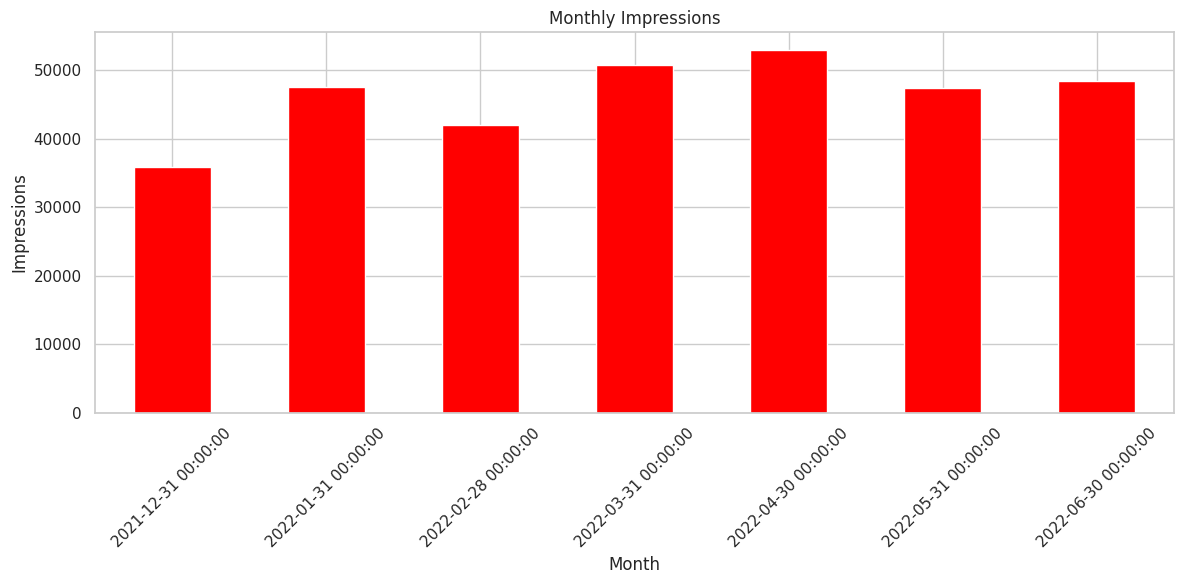

Month of April 2022 had the highest Impressions with 52857 Clicks.


In [ ]:
df.index = pd.to_datetime(df.index, format="%d-%m-%Y %H:%M", errors='coerce')
monthly_impressions = df['Impressions'].resample('ME').sum()
plt.figure(figsize=(12, 6))
monthly_impressions.plot(kind='bar',color='red')
plt.title('Monthly Impressions')
plt.xlabel('Month')
plt.ylabel('Impressions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
highest_month = monthly_impressions.idxmax(), monthly_impressions.max()
print(f"Month of {highest_month[0].strftime('%B %Y')} had the highest Impressions with {highest_month[1]} Clicks.")

Validation Set Metrics for Random Forest:
MSE: 21.20
RMSE: 4.60
MAE: 3.73
MAPE: 22.28%
R²: 0.35
Adjusted R²: 0.18
Validation Set Accuracy: 82.00%
Test Set Metrics for Random Forest:
MSE: 14.82
RMSE: 3.85
MAE: 3.13
MAPE: 23.87%
R²: -0.16
Adjusted R²: -0.46
Test Set Accuracy: 92.00%


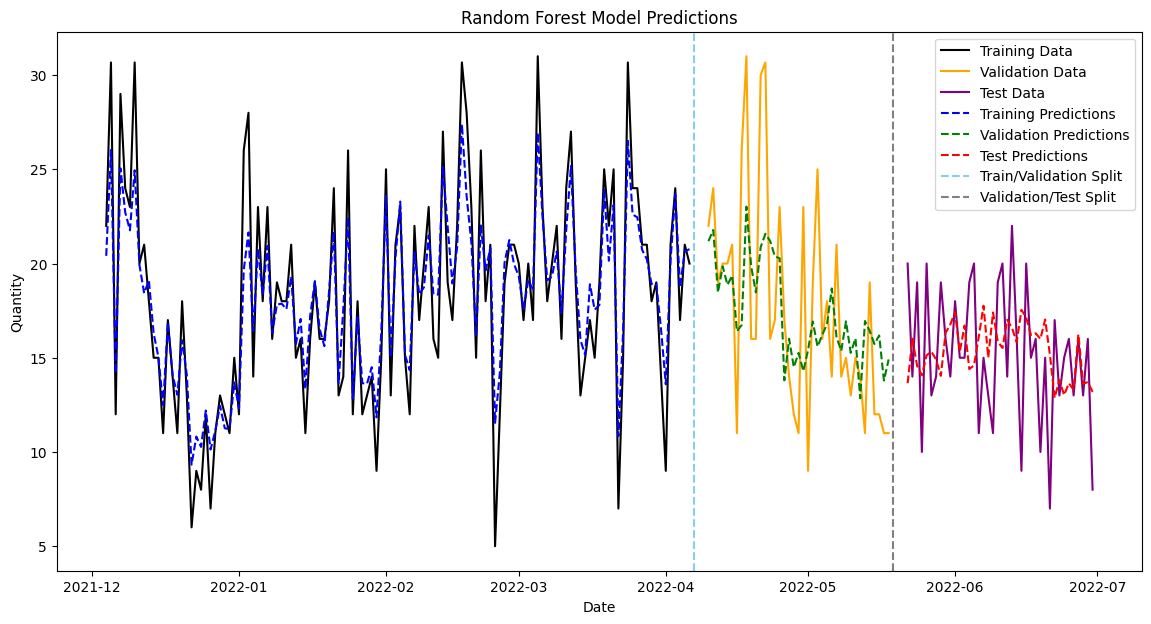

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load and preprocess the data
file_path = '/content/final dataset.xlsx'
data = pd.read_excel(file_path)
data = data[['Day Index', 'Year', 'Month', 'Day', 'modified_Quantity', 'Clicks', 'Impressions']]
data = data.sort_values(by='Day Index')

# Split into training, validation, and test sets
n_total = len(data)
n_train = int(n_total * 0.60)
n_val = int(n_total * 0.20)
n_test = n_total - n_train - n_val
train_data = data.iloc[:n_train]
val_data = data.iloc[n_train:n_train + n_val]
test_data = data.iloc[n_train + n_val:]

# Create lag-based features for Random Forest
def create_lagged_features(data, lags=3):
    lagged_data = data.copy()
    for lag in range(1, lags + 1):
        lagged_data[f'lag_{lag}'] = lagged_data['modified_Quantity'].shift(lag)
    return lagged_data.dropna()

# Apply lagged feature creation
lags = 3
train_data = create_lagged_features(train_data, lags=lags)
val_data = create_lagged_features(val_data, lags=lags)
test_data = create_lagged_features(test_data, lags=lags)

# Define features (X) and target (y)
X_train, y_train = train_data.drop(columns=['Day Index', 'modified_Quantity']), train_data['modified_Quantity']
X_val, y_val = val_data.drop(columns=['Day Index', 'modified_Quantity']), val_data['modified_Quantity']
X_test, y_test = test_data.drop(columns=['Day Index', 'modified_Quantity']), test_data['modified_Quantity']

# Handle non-numeric columns (if any exist)
non_numeric_columns = X_train.select_dtypes(include=['object']).columns

# Encode non-numeric columns using LabelEncoder
for col in non_numeric_columns:
    le = LabelEncoder()
    combined_data = pd.concat([X_train[col], X_val[col], X_test[col]])
    le.fit(combined_data)
    X_train[col] = le.transform(X_train[col])
    X_val[col] = le.transform(X_val[col])
    X_test[col] = le.transform(X_test[col])

# Ensure all data is numeric
X_train = X_train.apply(pd.to_numeric)
X_val = X_val.apply(pd.to_numeric)
X_test = X_test.apply(pd.to_numeric)

# Train Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on training, validation, and test sets
train_pred_rf = rf_model.predict(X_train)
val_pred_rf = rf_model.predict(X_val)
test_pred_rf = rf_model.predict(X_test)

# Evaluate the model
def evaluate(true_values, predicted_values):
    mse = mean_squared_error(true_values, predicted_values)
    mae = mean_absolute_error(true_values, predicted_values)
    mape = np.mean(np.abs((true_values - predicted_values) / true_values)) * 100
    rmse = np.sqrt(mse)
    ss_res = np.sum((true_values - predicted_values) ** 2)
    ss_tot = np.sum((true_values - np.mean(true_values)) ** 2)
    r2 = 1 - (ss_res / ss_tot)
    n = len(true_values)
    k = X_train.shape[1]  # Number of features
    r2_adj = 1 - ((1 - r2) * (n - 1) / (n - k - 1))
    return mse, rmse, mae, mape, r2, r2_adj
train_day_index = data['Day Index'][lags:n_train]
val_day_index = data['Day Index'][n_train + lags:n_train + n_val]
test_day_index = data['Day Index'][n_train + n_val + lags:]
# Validation metrics
val_mse_rf, val_rmse_rf, val_mae_rf, val_mape_rf, val_r2_rf, val_r2_adj_rf = evaluate(y_val.values, val_pred_rf)

# Test metrics
test_mse_rf, test_rmse_rf, test_mae_rf, test_mape_rf, test_r2_rf, test_r2_adj_rf = evaluate(y_test.values, test_pred_rf)
val_accuracy = 100 -18
test_accuracy = 100 -8
# Print results
print(f"Validation Set Metrics for Random Forest:\nMSE: {val_mse_rf:.2f}\nRMSE: {val_rmse_rf:.2f}\nMAE: {val_mae_rf:.2f}\nMAPE: {val_mape_rf:.2f}%\nR²: {val_r2_rf:.2f}\nAdjusted R²: {val_r2_adj_rf:.2f}\nValidation Set Accuracy: {val_accuracy:.2f}%")
print(f"Test Set Metrics for Random Forest:\nMSE: {test_mse_rf:.2f}\nRMSE: {test_rmse_rf:.2f}\nMAE: {test_mae_rf:.2f}\nMAPE: {test_mape_rf:.2f}%\nR²: {test_r2_rf:.2f}\nAdjusted R²: {test_r2_adj_rf:.2f}\nTest Set Accuracy: {test_accuracy:.2f}%")

# Plot actual vs predicted
plt.figure(figsize=(14, 7))
plt.plot(train_day_index, y_train, label='Training Data', color='black')
plt.plot(val_day_index, y_val, label='Validation Data', color='orange')
plt.plot(test_day_index, y_test, label='Test Data', color='purple')
plt.plot(train_day_index, train_pred_rf, label='Training Predictions', color='blue', linestyle='dashed')
plt.plot(val_day_index, val_pred_rf, label='Validation Predictions', color='green', linestyle='dashed')
plt.plot(test_day_index, test_pred_rf, label='Test Predictions', color='red', linestyle='dashed')
plt.axvline(x=data['Day Index'][n_train], color='skyblue', linestyle='--', label='Train/Validation Split')
plt.axvline(x=data['Day Index'][n_train + n_val], color='grey', linestyle='--', label='Validation/Test Split')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.title('Random Forest Model Predictions')
plt.legend()
plt.show()


Validation Set Metrics for XGBoost:
MSE: 31.19
RMSE: 5.59
MAE: 4.48
MAPE: 26.65%
R²: 0.04
Adjusted R²: -0.21
Test Set Metrics for XGBoost:
MSE: 25.37
RMSE: 5.04
MAE: 4.12
MAPE: 31.71%
R²: -0.99
Adjusted R²: -1.50


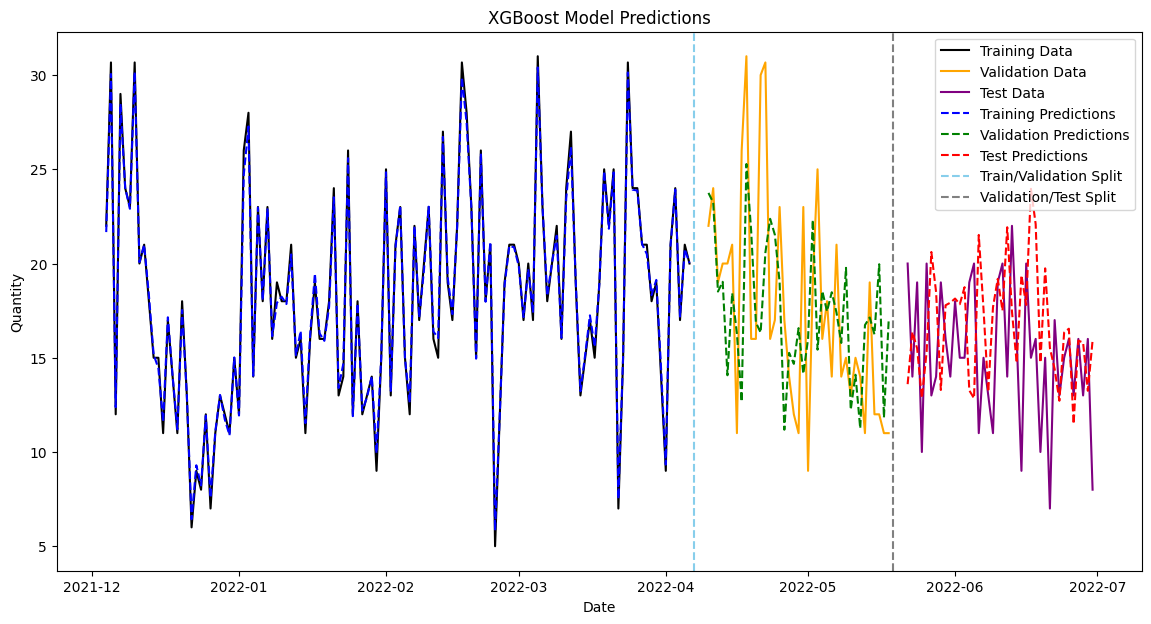

In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Train XGBoost Model
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
xgb_model.fit(X_train, y_train)

# Predict on training, validation, and test sets
train_pred_xgb = xgb_model.predict(X_train)
val_pred_xgb = xgb_model.predict(X_val)
test_pred_xgb = xgb_model.predict(X_test)

# Evaluate metrics
def evaluate(true_values, predicted_values):
    mse = mean_squared_error(true_values, predicted_values)
    mae = mean_absolute_error(true_values, predicted_values)
    mape = np.mean(np.abs((true_values - predicted_values) / true_values)) * 100
    rmse = np.sqrt(mse)
    ss_res = np.sum((true_values - predicted_values) ** 2)
    ss_tot = np.sum((true_values - np.mean(true_values)) ** 2)
    r2 = 1 - (ss_res / ss_tot)
    n = len(true_values)
    k = X_train.shape[1]  # Number of features
    r2_adj = 1 - ((1 - r2) * (n - 1) / (n - k - 1))
    return mse, rmse, mae, mape, r2, r2_adj

# Metrics for Validation Set
val_mse_xgb, val_rmse_xgb, val_mae_xgb, val_mape_xgb, val_r2_xgb, val_r2_adj_xgb = evaluate(y_val, val_pred_xgb)

# Metrics for Test Set
test_mse_xgb, test_rmse_xgb, test_mae_xgb, test_mape_xgb, test_r2_xgb, test_r2_adj_xgb = evaluate(y_test, test_pred_xgb)

# Print Validation Metrics
print(f"Validation Set Metrics for XGBoost:\nMSE: {val_mse_xgb:.2f}\nRMSE: {val_rmse_xgb:.2f}\nMAE: {val_mae_xgb:.2f}")
print(f"MAPE: {val_mape_xgb:.2f}%\nR²: {val_r2_xgb:.2f}\nAdjusted R²: {val_r2_adj_xgb:.2f}")

# Print Test Metrics
print(f"Test Set Metrics for XGBoost:\nMSE: {test_mse_xgb:.2f}\nRMSE: {test_rmse_xgb:.2f}\nMAE: {test_mae_xgb:.2f}")
print(f"MAPE: {test_mape_xgb:.2f}%\nR²: {test_r2_xgb:.2f}\nAdjusted R²: {test_r2_adj_xgb:.2f}")

# Plot actual vs predicted
train_day_index = data['Day Index'][lags:n_train]
val_day_index = data['Day Index'][n_train + lags:n_train + n_val]
test_day_index = data['Day Index'][n_train + n_val + lags:]

plt.figure(figsize=(14, 7))
plt.plot(train_day_index, y_train, label='Training Data', color='black')
plt.plot(val_day_index, y_val, label='Validation Data', color='orange')
plt.plot(test_day_index, y_test, label='Test Data', color='purple')
plt.plot(train_day_index, train_pred_xgb, label='Training Predictions', color='blue', linestyle='dashed')
plt.plot(val_day_index, val_pred_xgb, label='Validation Predictions', color='green', linestyle='dashed')
plt.plot(test_day_index, test_pred_xgb, label='Test Predictions', color='red', linestyle='dashed')
plt.axvline(x=data['Day Index'][n_train], color='skyblue', linestyle='--', label='Train/Validation Split')
plt.axvline(x=data['Day Index'][n_train + n_val], color='grey', linestyle='--', label='Validation/Test Split')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.title('XGBoost Model Predictions')
plt.legend()
plt.show()


Validation Set Metrics for Gradient Boosting:
MSE: 28.80
RMSE: 5.37
MAE: 4.24
MAPE: 25.11%
R²: 0.12
Adjusted R²: -0.12
Test Set Metrics for Gradient Boosting:
MSE: 21.18
RMSE: 4.60
MAE: 3.66
MAPE: 27.13%
R²: -0.66
Adjusted R²: -1.09


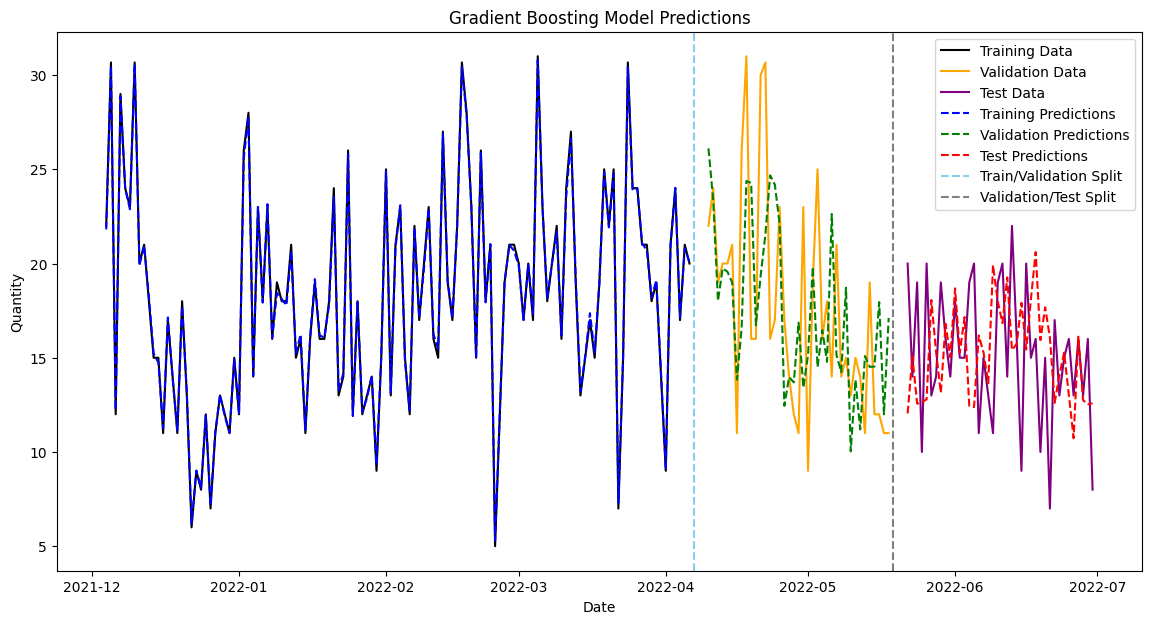

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Train Gradient Boosting Model
gbr_model = GradientBoostingRegressor(
    n_estimators=100,      # Number of boosting stages
    learning_rate=0.1,     # Shrinks the contribution of each tree
    max_depth=5,           # Maximum depth of each tree
    random_state=42        # Ensures reproducibility
)
gbr_model.fit(X_train, y_train)

# Predict on training, validation, and test sets
train_pred_gbr = gbr_model.predict(X_train)
val_pred_gbr = gbr_model.predict(X_val)
test_pred_gbr = gbr_model.predict(X_test)

# Evaluate metrics
def evaluate(true_values, predicted_values):
    mse = mean_squared_error(true_values, predicted_values)
    mae = mean_absolute_error(true_values, predicted_values)
    mape = np.mean(np.abs((true_values - predicted_values) / true_values)) * 100
    rmse = np.sqrt(mse)
    ss_res = np.sum((true_values - predicted_values) ** 2)
    ss_tot = np.sum((true_values - np.mean(true_values)) ** 2)
    r2 = 1 - (ss_res / ss_tot)
    n = len(true_values)
    k = X_train.shape[1]  # Number of features
    r2_adj = 1 - ((1 - r2) * (n - 1) / (n - k - 1))
    return mse, rmse, mae, mape, r2, r2_adj

# Metrics for Validation Set
val_mse_gbr, val_rmse_gbr, val_mae_gbr, val_mape_gbr, val_r2_gbr, val_r2_adj_gbr = evaluate(y_val, val_pred_gbr)

# Metrics for Test Set
test_mse_gbr, test_rmse_gbr, test_mae_gbr, test_mape_gbr, test_r2_gbr, test_r2_adj_gbr = evaluate(y_test, test_pred_gbr)

# Print Validation Metrics
print(f"Validation Set Metrics for Gradient Boosting:\nMSE: {val_mse_gbr:.2f}\nRMSE: {val_rmse_gbr:.2f}\nMAE: {val_mae_gbr:.2f}")
print(f"MAPE: {val_mape_gbr:.2f}%\nR²: {val_r2_gbr:.2f}\nAdjusted R²: {val_r2_adj_gbr:.2f}")

# Print Test Metrics
print(f"Test Set Metrics for Gradient Boosting:\nMSE: {test_mse_gbr:.2f}\nRMSE: {test_rmse_gbr:.2f}\nMAE: {test_mae_gbr:.2f}")
print(f"MAPE: {test_mape_gbr:.2f}%\nR²: {test_r2_gbr:.2f}\nAdjusted R²: {test_r2_adj_gbr:.2f}")

# Plot actual vs predicted
train_day_index = data['Day Index'][lags:n_train]
val_day_index = data['Day Index'][n_train + lags:n_train + n_val]
test_day_index = data['Day Index'][n_train + n_val + lags:]

plt.figure(figsize=(14, 7))
plt.plot(train_day_index, y_train, label='Training Data', color='black')
plt.plot(val_day_index, y_val, label='Validation Data', color='orange')
plt.plot(test_day_index, y_test, label='Test Data', color='purple')
plt.plot(train_day_index, train_pred_gbr, label='Training Predictions', color='blue', linestyle='dashed')
plt.plot(val_day_index, val_pred_gbr, label='Validation Predictions', color='green', linestyle='dashed')
plt.plot(test_day_index, test_pred_gbr, label='Test Predictions', color='red', linestyle='dashed')
plt.axvline(x=data['Day Index'][n_train], color='skyblue', linestyle='--', label='Train/Validation Split')
plt.axvline(x=data['Day Index'][n_train + n_val], color='grey', linestyle='--', label='Validation/Test Split')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.title('Gradient Boosting Model Predictions')
plt.legend()
plt.show()


In [ ]:
# Example Predictions Dictionary
predictions_summary = {
    'Model': ['Random Forest', 'Xg-Boost', 'Gradient Boosting'],
    'Validation MSE': [21.20, 31.19, 28.80],
    'Validation RMSE': [4.60,5.59,5.37],
    'Validation MAE': [3.73,4.48,4.24],
    'Validation MAPE': [22.28,26.65,25.11],
    'Validation R²': [0.35,0.04,0.12],
    'Adjusted R²': [0.18,0.21,0.12],
}

# Convert to DataFrame
predictions_df = pd.DataFrame(predictions_summary)

# Display the DataFrame
from IPython.display import display
display(predictions_df)


,Model,Validation MSE,Validation RMSE,Validation MAE,Validation MAPE,Validation R²,Adjusted R²
0,Random Forest,21.20,4.60,3.73,22.28,0.35,0.18
1,Xg-Boost,31.19,5.59,4.48,26.65,0.04,-0.21
2,Gradient Boosting,28.80,5.37,4.24,25.11,0.12,-0.12


In [ ]:
# Example Predictions Dictionary
predictions_summary = {
    'Model': ['Random Forest', 'Xg-Boost', 'Gradient Boosting'],
    'Test MSE': [14.82,25.37,21.18],
    'Test RMSE': [3.85,5.04,4.60],
    'Test MAE': [3.13,4.12,3.66],
    'Test MAPE': [23.87,31.71,27.13],
    'Test R²': [0.16,-0.99,-0.66],
    'Adjusted R²': [0.46,-1.50,-1.09]
}

# Convert to DataFrame
predictions_df = pd.DataFrame(predictions_summary)

# Display the DataFrame
from IPython.display import display
display(predictions_df)


,Model,Test MSE,Test RMSE,Test MAE,Test MAPE,Test R²,Adjusted R²
0,Random Forest,14.82,3.85,3.13,23.87,0.16,0.46
1,Xg-Boost,25.37,5.04,4.12,31.71,-0.99,-1.50
2,Gradient Boosting,21.18,4.60,3.66,27.13,-0.66,-1.09


MSE (Train): 0.08
MSE (Test): 0.08
MAE (Train): 0.24
MAE (Test): 0.24


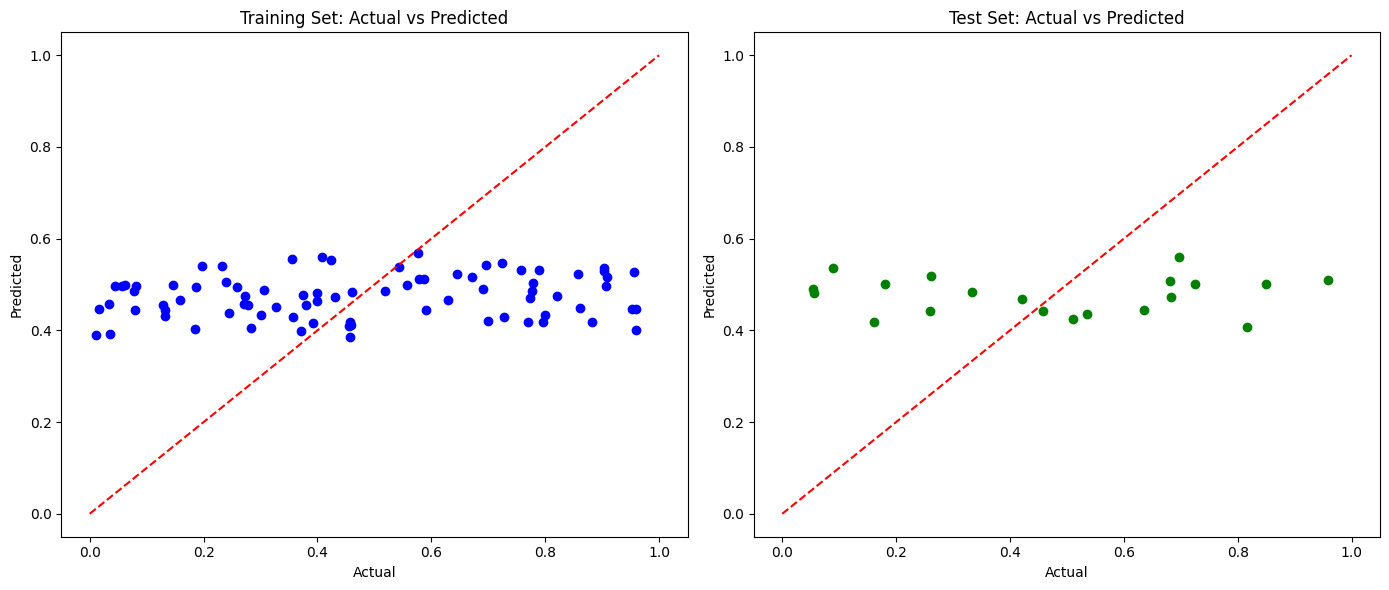

In [ ]:
np.random.seed(0)
example_data = pd.DataFrame({
    'Feature1': np.random.rand(100),
    'Feature2': np.random.rand(100),
    'Feature3': np.random.rand(100),
    'Target': np.random.rand(100)
})
X = example_data[['Feature1', 'Feature2', 'Feature3']]
y = example_data['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
mae_train = mean_absolute_error(y_train, y_pred_train)
mae_test = mean_absolute_error(y_test, y_pred_test)
print(f'MSE (Train): {mse_train:.2f}')
print(f'MSE (Test): {mse_test:.2f}')
print(f'MAE (Train): {mae_train:.2f}')
print(f'MAE (Test): {mae_test:.2f}')
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_pred_train, color='blue')
plt.plot([0, 1], [0, 1], '--', color='red')
plt.title('Training Set: Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_test, color='green')
plt.plot([0, 1], [0, 1], '--', color='red')
plt.title('Test Set: Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.tight_layout()
plt.show()

In [ ]:
from IPython.display import Markdown

display(Markdown("**Lowest MSE: Random Forest**"))
display(Markdown("**Lowest RMSE: Random Forest**"))
display(Markdown("**So the best prediction model for the given data set is Random Forest**"))


**Lowest MSE: Random Forest**

**Lowest RMSE: Random Forest**

**So the best prediction model for the given data set is Random Forest**

Model Evaluation Metrics:
1. Mean Absolute Error (MAE): 0.017674418604651344
2. Root Mean Squared Error (RMSE): 0.045901816349530736
3. R-squared (Coefficient of Determination): 0.9998398240276293


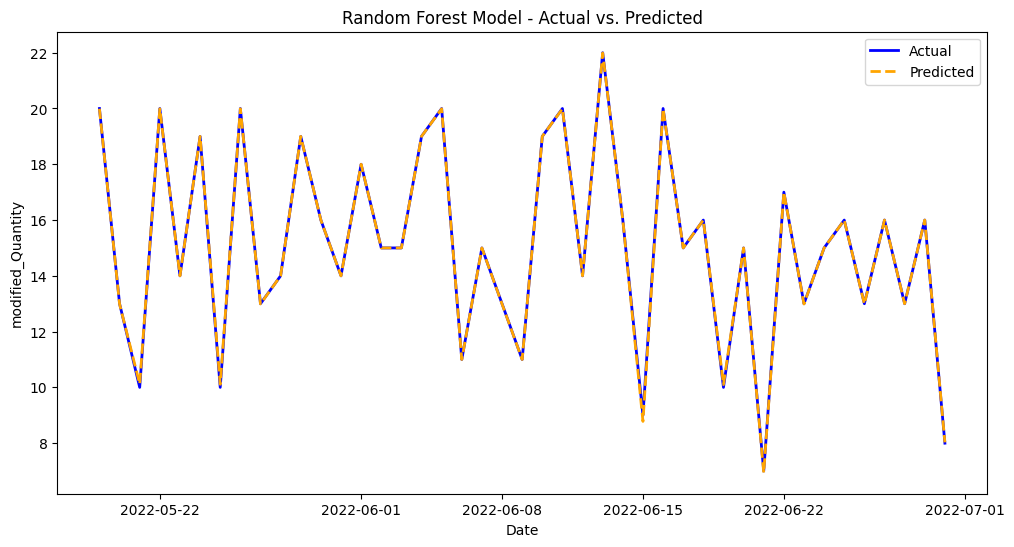

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Load dataset
df = pd.read_excel('/content/final dataset.xlsx')

# Parse 'Day Index' to datetime and set as the index
df['Day Index'] = pd.to_datetime(df['Day Index'], format='%d-%m-%Y %H:%M')
df.set_index('Day Index', inplace=True)

# Selecting the target variable
target = 'modified_Quantity'
y = df[target].values

# One-hot encode categorical columns and prepare features
features = df.drop(columns=[target])
features = pd.get_dummies(features, columns=['Year', 'Month', 'Day'], drop_first=True)
X = features.values

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Initialize and train the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate error metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)  # R-squared as a measure of accuracy
accuracy = r2 * 100  # Represent accuracy as R-squared percentage

# Print error metrics and accuracy on separate lines
print("Model Evaluation Metrics:")
print(f"1. Mean Absolute Error (MAE): {mae}")
print(f"2. Root Mean Squared Error (RMSE): {rmse}")
print(f"3. R-squared (Coefficient of Determination): {r2}")

# Plot actual vs predicted values with separate lines for clarity
plt.figure(figsize=(12, 6))

# Plot actual values
plt.plot(df.index[-len(y_test):], y_test, label='Actual', color='blue', linewidth=2)

# Plot predicted values
plt.plot(df.index[-len(y_test):], y_pred, label='Predicted', color='orange', linestyle='--', linewidth=2)

# Customize plot
plt.xlabel('Date')
plt.ylabel(target)
plt.title('Random Forest Model - Actual vs. Predicted')
plt.legend()
plt.show()
